<a href="https://colab.research.google.com/github/JuhiNayak/Machine-Learning/blob/master/Scikit_K_means_JuhiNayak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CMPE 257: Assignment 1

Author: Juhi Nayak

Applying k-means algorithm using Scikit-learn

Dataset Source: https://www.kaggle.com/altruistdelhite04/loan-prediction-problem-dataset?select=train_u6lujuX_CVtuZ9i.csv

Reference: https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.11-K-Means.ipynb

Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Upload file form local drive


In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving datasets_bank_laon.csv to datasets_bank_laon.csv


Read csv file and store in dataframe

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['datasets_bank_laon.csv']), encoding='latin-1')
df.head(15)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


Data preparation: Handle Null values

In [ ]:
df.fillna(df.mean(), inplace=True)
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

Calculate the total income and store in a new column in dataframe

In [ ]:
totalIncome = df["ApplicantIncome"] + df["CoapplicantIncome"]
df["totalIncome"] = totalIncome
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,totalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


Scattering the Applicant Total Income and LoanAmount values in a plot

[[5849.          146.41216216]
 [6091.          128.        ]
 [3000.           66.        ]
 ...
 [8312.          253.        ]
 [7583.          187.        ]
 [4583.          133.        ]]


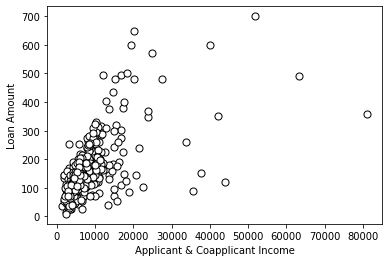

In [ ]:
x = df.iloc[:,[13,8]].values
print(x)
plt.scatter(
   x[:, 0], x[:, 1],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.xlabel('Applicant & Coapplicant Income')
plt.ylabel('Loan Amount')
plt.show()

 Elbow method: calculate distortion for a range of number of cluster

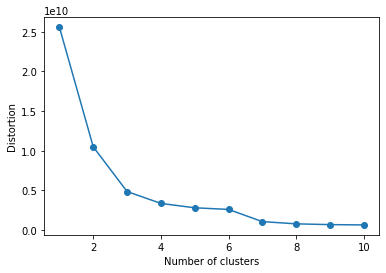

In [ ]:
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

Apply K-Means algorithm

In [ ]:
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(x)

 plot the 3 clusters

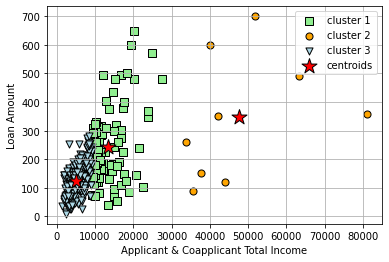

In [ ]:

plt.scatter(
    x[y_km == 0, 0], x[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    x[y_km == 1, 0], x[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    x[y_km == 2, 0], x[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.xlabel('Applicant & Coapplicant Total Income')
plt.ylabel('Loan Amount')
plt.show()

The dataset has some useful columns which can help to train the data such that it can predict whether the applicant is capable of having the loan from the bank for the requested amount based on the Applicant and Co-applicant income and Loan amount term.

The final clustering graph indicates the person having more total income can get approval for a higher loan amount and with lower total income will not get approval for a higher loan amount. Here the total amount indicates a total of both Applicant's Income and Co-applicant's income.